# Graph
## Neural Network

In [104]:
import numpy as np
import tensorflow as tf

In [105]:
np.random.seed(101)
tf.set_random_seed(102)

In [106]:
rand_a =np.random.uniform(0,100,(5,5))
rand_a

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [107]:
rand_b = np.random.uniform(0,100,(5,1))

In [108]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [109]:
add_op = a + b
mul_op = a * b

In [110]:
with tf.Session() as sess:
    add_result = sess.run(add_op,feed_dict={a:15,b:30})
    mul_result = sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})

In [111]:
mul_result

array([[ 5134.64404297,  5674.25      ,   283.12432861,  1705.47070312,
         6813.83154297],
       [ 4341.8125    ,  1598.26696777,  4652.73388672,  3756.8293457 ,
          988.9463501 ],
       [ 3207.8112793 ,  2038.10290527,  1052.77416992,  4546.98046875,
         5588.11572266],
       [ 1707.37902832,   614.02526855,  4434.98876953,  5356.77734375,
         2029.85546875],
       [ 3714.09838867,  2806.64379883,   262.76763916,   747.19854736,
         1013.29199219]], dtype=float32)

# Neural network

In [112]:
n_features = 10
n_dense_neuron=3

In [113]:
x = tf.placeholder(tf.float32,(None,n_features))
w = tf.Variable(tf.random_normal([n_features,n_dense_neuron]))
b = tf.ones([n_dense_neuron])

In [114]:
wx = tf.matmul(x,w)
a = tf.add(wx,b)
z = tf.sigmoid(a)
init = tf.global_variables_initializer()

In [115]:
with tf.Session() as sess:

    sess.run(init)
    result = sess.run(z,feed_dict={x:np.random.random([1,n_features])})
    print (result)


[[ 0.77749461  0.4264209   0.85282564]]


## Simple Regression Example

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
x_data = np.linspace(0,10,10)+np.random.uniform(-1.5,+1.5,10)

In [118]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [119]:
y_label = np.linspace(0,10,10)+np.random.uniform(-1.5,+1.5,10)

In [120]:
y_label

array([ 0.5420333 ,  1.17575569,  0.85241231,  2.50514314,  4.67005971,
        4.41685654,  6.66701681,  6.69180648,  7.54731409,  9.03483077])

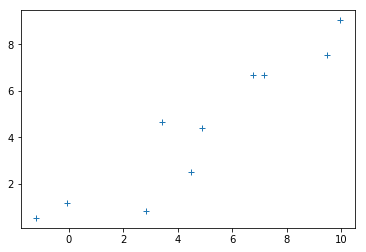

In [121]:
plt.plot(x_data,y_label,'+')

y = mx + b

In [122]:
np.random.rand(2)

array([ 0.44236813,  0.87758732])

In [123]:
m = tf.Variable(0.080)
b = tf.Variable(0.607)

In [125]:
error = 0
print (type(error))


<class 'int'>


In [130]:
for x,y in zip(x_data,y_label):
    y_hat = m*x+b
    
    error+= (y-y_hat)**2
    print (error.eval)

<bound method Tensor.eval of <tf.Tensor 'add_147:0' shape=() dtype=float32>>
<bound method Tensor.eval of <tf.Tensor 'add_149:0' shape=() dtype=float32>>
<bound method Tensor.eval of <tf.Tensor 'add_151:0' shape=() dtype=float32>>
<bound method Tensor.eval of <tf.Tensor 'add_153:0' shape=() dtype=float32>>
<bound method Tensor.eval of <tf.Tensor 'add_155:0' shape=() dtype=float32>>
<bound method Tensor.eval of <tf.Tensor 'add_157:0' shape=() dtype=float32>>
<bound method Tensor.eval of <tf.Tensor 'add_159:0' shape=() dtype=float32>>
<bound method Tensor.eval of <tf.Tensor 'add_161:0' shape=() dtype=float32>>
<bound method Tensor.eval of <tf.Tensor 'add_163:0' shape=() dtype=float32>>
<bound method Tensor.eval of <tf.Tensor 'add_165:0' shape=() dtype=float32>>


In [131]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [132]:
error

<tf.Tensor 'add_165:0' shape=() dtype=float32>

### important when you define new variables

In [133]:
init = tf.global_variables_initializer()

In [138]:
with tf.Session() as sess:
    sess.run(init)
    
    training_steps = 15
    
    
    for i in range(training_steps):
        sess.run(train)
        
    final_slope ,final_intercept =sess.run([m,b])
    print (m.eval())

0.766326


In [139]:
m

<tf.Variable 'Variable_10:0' shape=() dtype=float32_ref>

In [140]:
x_test = np.linspace(0,10,10)
y_pred_plot = final_slope * x_test + final_intercept



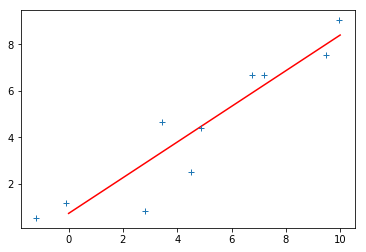

In [141]:
plt.plot(x_test,y_pred_plot,'red')
plt.plot(x_data,y_label,'+')